# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Denisa Dwi Nanjalina]
- **Email:** [denisadwi793@gmail.com]
- **ID Dicoding:** [denisadwinanjalina]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh waktu terhadap pola penyewaan sepeda?
-Bagaimana pengaruh dari faktor cuaca terhadap jumlah total pengguna sepeda pada hari kerja dibandingkan dengan hari libur atau tidak bekerja?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("/content/drive/MyDrive/submission/dataset/day.csv")
print(day_df.head())
hour_df = pd.read_csv("/content/drive/MyDrive/submission/dataset/hour.csv")
print((hour_df.head()))

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Assessing Data

* Menilai data day_df
* Kita akan memeriksa jumlah dan tipe data tiap kolom yang berada pada day_df




In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


# **Missing value**

In [ ]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


# **Duplicates**

menyelidiki apakah data duplikat atau tidak

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


# **Invalid values**

In [ ]:
hour_df[hour_df['cnt'] < 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [ ]:
day_df[day_df['cnt'] < 0]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


# **Inaccurate values**

In [ ]:
day_df[(day_df['temp'] < 0) | (day_df['temp'] > 1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [ ]:
hour_df[(hour_df['temp'] < 0) | (hour_df['temp'] > 1)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


# **Inconsistent values**

In [ ]:
day_df[~day_df['season'].isin([1, 2, 3, 4])]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [ ]:
hour_df[~hour_df['season'].isin([1, 2, 3, 4])]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Outlier

In [ ]:
Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (day_df['cnt'] < (Q1 - 1.5 * IQR)) | (day_df['cnt'] > (Q3 + 1.5 * IQR))
outliers = day_df[outlier_condition]
print("Outliers:\n", outliers)

Outliers:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [ ]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (hour_df['cnt'] < (Q1 - 1.5 * IQR)) | (hour_df['cnt'] > (Q3 + 1.5 * IQR))
outliers = hour_df[outlier_condition]
print("Outliers:\n", outliers)

Outliers:
        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5536      5537  2011-08-23       3   0     8  14        0        2   
10358    10359  2012-03-12       1   1     3  17        0        1   
10359    10360  2012-03-12       1   1     3  18        0        1   
10382    10383  2012-03-13       1   1     3  17        0        2   
10383    10384  2012-03-13       1   1     3  18        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16885    16886  2012-12-11       4   1    12   8        0        2   
16909    16910  2012-12-12       4   1    12   8        0        3   
16933    16934  2012-12-13       4   1    12   8        0        4   
17053    17054  2012-12-18       4   1    12   8        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
5536            1           1  0.72  0.6515  0.30     0.0896     149   
1035

**Insight:**
- Mengetahui bahwa pada dataset day_df dan hour_df tidak terdapat missing value,duplicates, invalid value, inaccurate values, dan incosistent values
- Mengetahui bahwa pada dataset day_df dan hour_df terdapat kesalahan tipe data untuk kolom dteday menggunakan function info().

### Cleaning Data

1.   Kita akan mengatasi permasalahan  outliers pada  dataset hour_df dengan metode drop





In [ ]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

kondisi_lower_than = hour_df['cnt'] < minimum
kondisi_more_than = hour_df['cnt'] > maximum

hour_df_dropped = hour_df.drop(hour_df[kondisi_lower_than].index)
hour_df_dropped = hour_df_dropped.drop(hour_df_dropped[kondisi_more_than].index)
print("Dataset setelah drop outliers:\n", hour_df_dropped)
jumlah_baris_sebelum = len(hour_df)
print(f"Jumlah baris sebelum menghapus outliers: {jumlah_baris_sebelum}")

Dataset setelah drop outliers:
        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


2. Selanjutnya kita akan mengatasi masalah pada day_df dan hour_df dengan mengganti tipe data pada kolom dteday menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas.



In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
column = "dteday"
day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
column = "dteday"
hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   yr           17379 non-null  int64         
 4   mnth         17379 non-null  int64         
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weathersit   17379 non-null  int64         
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

**Insight:**
- Setelah mengalami outlier,jumlah baris berkurang dari 17.379 menjadi 16.874. Hal ini berarti bahwa ada 505 data poin yang diidentifikasi sebagai outliers dan dihapus untuk membersihkan dataset, agar hasil analisis lebih akurat dan relevan.
- Telah berhasil membersihkan kesalahan tipe data object menjadi datetime pada tabel hour_df dan day_df di kolom dteday menggunakan function to_datetime() yang disediakan oleh library pandas.

## Exploratory Data Analysis (EDA)

**Bagaimana pengaruh waktu terhadap pola penyewaan sepeda?**

In [ ]:

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['day_of_week'] = hour_df['dteday'].dt.day_name()
hour_df['hour'] = hour_df['hr']
peak_hours = hour_df.groupby(['day_of_week', 'hour'])['cnt'].sum().reset_index()
peak_hours['max_cnt'] = peak_hours.groupby('day_of_week')['cnt'].transform('max')
peak_peak_hours = peak_hours[peak_hours['cnt'] == peak_hours['max_cnt']]
print("Jam puncak penyewaan sepeda setiap hari:\n", peak_peak_hours)


Jam puncak penyewaan sepeda setiap hari:
     day_of_week  hour    cnt  max_cnt
17       Friday    17  51211    51211
41       Monday    17  52249    52249
61     Saturday    13  40464    40464
85       Sunday    13  39368    39368
113    Thursday    17  54844    54844
137     Tuesday    17  56605    56605
161   Wednesday    17  53367    53367


Bagaimana pengaruh dari faktor cuaca terhadap jumlah total pengguna sepeda pada hari kerja dibandingkan dengan hari libur atau tidak bekerja?:

In [ ]:
weather_workday_df = day_df[day_df["workingday"] == 1].groupby(["weathersit"]).cnt.sum().sort_values(ascending=False).reset_index()
# karena tidak ada cuaca 4 maka akan kita tambahkan cuaca 4 dengan cnt bernilai 0.
if not (weather_workday_df['weathersit'] == 4).any():
    new_row = pd.DataFrame({"weathersit": [4], "cnt": [0]})
    weather_workday_df = pd.concat([weather_workday_df, new_row], ignore_index=True)

weather_workday_df.rename(columns={
    "weathersit": "weather_index",
    "cnt": "users_count"
}, inplace=True)

weather_workday_df.head()

,weather_index,users_count
0,1,1542338
1,2,721280
2,3,28792
3,4,0


korelasi antara cuaca dengan hari libur

In [29]:
weather_workday_df = day_df[day_df["workingday"] == 0].groupby(["weathersit"]).cnt.sum().sort_values(ascending=False).reset_index()
# karena tidak ada cuaca 4 maka akan kita tambahkan cuaca 4 dengan cnt bernilai 0.
if not (weather_workday_df['weathersit'] == 4).any():
    new_row = pd.DataFrame({"weathersit": [4], "cnt": [0]})
    weather_workday_df = pd.concat([weather_workday_df, new_row], ignore_index=True)

weather_workday_df.rename(columns={
    "weathersit": "weather_index",
    "cnt": "users_count"
}, inplace=True)

weather_workday_df.head()

,weather_index,users_count
0,1,715614
1,2,275578
2,3,9077
3,4,0


**Insight:**
- Rata-rata penyewaan sepeda per hari menggambarkan adanya perbedaan anatara hari kerja dan hari libur.
- Faktor cuaca memberikan pengaruh bagi penyewaan sepeda. Cuaca buruk cenderung memberikan penurunan penggunaan Bike Sharing

## Visualization & Explanatory Analysis

### Bagaimana pengaruh waktu terhadap pola penyewaan sepeda?:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

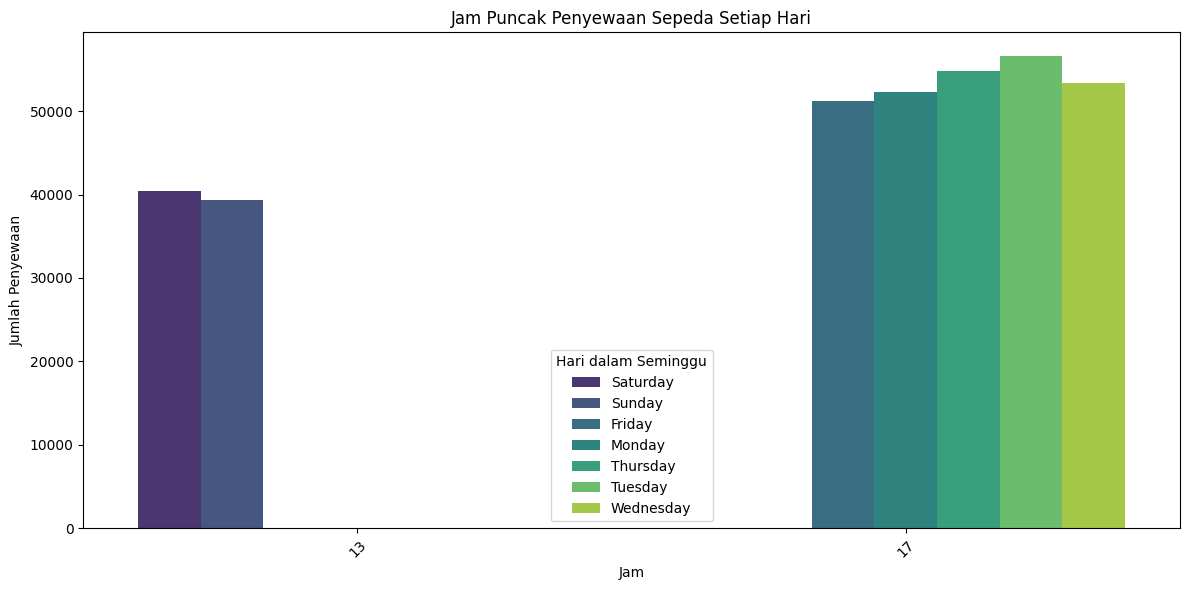

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=peak_peak_hours, x='hour', y='cnt', hue='day_of_week', palette='viridis')
plt.title('Jam Puncak Penyewaan Sepeda Setiap Hari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.legend(title='Hari dalam Seminggu')
plt.tight_layout()
plt.show()

### Bagaimana pengaruh dari faktor cuaca terhadap jumlah total pengguna sepeda pada hari kerja dibandingkan dengan hari libur atau tidak bekerja?::

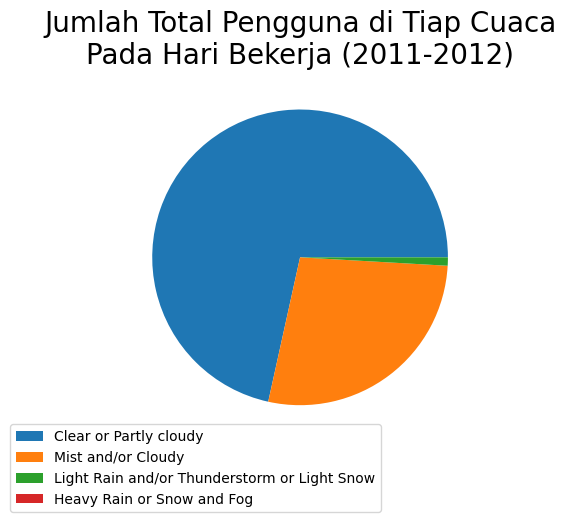

In [31]:
fig, ax = plt.subplots()
labels_detail = [
    'Clear or Partly cloudy',
    'Mist and/or Cloudy',
    'Light Rain and/or Thunderstorm or Light Snow',
    'Heavy Rain or Snow and Fog'
]
size = weather_workday_df["users_count"]
pie = plt.pie(size, startangle=0)
title = plt.title("Jumlah Total Pengguna di Tiap Cuaca\nPada Hari Bekerja (2011-2012)", fontsize=20)
title.set_ha("center")
plt.legend(
    pie[0],
    labels_detail,
    bbox_to_anchor=(0.65,-0.05),
    loc="lower right",
    bbox_transform=plt.gcf().transFigure
)
plt.show()

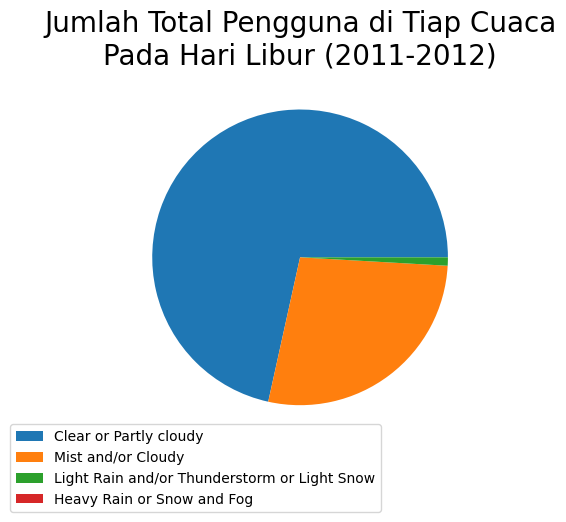

In [30]:
fig, ax = plt.subplots()
labels_detail = [
    'Clear or Partly cloudy',
    'Mist and/or Cloudy',
    'Light Rain and/or Thunderstorm or Light Snow',
    'Heavy Rain or Snow and Fog'
]
size = weather_workday_df["users_count"]
pie = plt.pie(size, startangle=0)
title = plt.title("Jumlah Total Pengguna di Tiap Cuaca\nPada Hari Libur (2011-2012)", fontsize=20)
title.set_ha("center")
plt.legend(
    pie[0],
    labels_detail,
    bbox_to_anchor=(0.65,-0.05),
    loc="lower right",
    bbox_transform=plt.gcf().transFigure
)
plt.show()

**Insight:**
- Pada Visualisasi terhadap pertanyaan pertama dapat terlihat bahwa pada Hari Selasa merupakan hari terbanyak pengguna Bike Sharing. Sedangkan pada Hari Minggu merupakan hari dengan pengguna Bike Sharing paling sedikit
- Pada Visualisasi terhadap pertanyaan kedua dapat terlihat bahwa pengguna Bike Sharing paling banyak pada cuaca cerah atau sedikit berawan dan paling sedikit pengguna Bike Sharing berada pada cuaca hujan ringan/badai petir/salju tipis.

## Analisis Lanjutan (Opsional)

## Conclusion

- Jadi dapat disimpulkan bahwa terdapat korelasi antara waktu dan total pengguna Bike Sharing antara Hari Kerja dan Hari Libur. Di hari kerja lebih banyak pengguna Bike Sharing daripada di hari libur
- Jadi dapat disimpulkan bahwa terdapat pengaruh faktor cuaca dengan penggunaan Bike Sharing.Menurut hasil pie chart dapat terlihat bahwa semakin baik cuaca maka semakin banyak penggunaan Bike Sharing dan semakin buruk cuaca semakin sedikit penggunaan Bike Sharing.